# WeatherPy

## Observations

The first observation made from this data analysis is that the maximum temperature of the cities dataset is higher the closer the city is to the zero latitude line or equator.  This observation makes sense as the primary reason for higher temperatures at the equator is because that section of the planet is closer towards the sun than the poles are to the sun.

The second observation is that for this time of year (August 2021), it can be observed that the maximum temperature of the cities occurs at slightly higher latitudes from the equator due to the summer solstice.  Conversely, temperatures for cities below the zero line of the equator are lower at this time of year due to the souther winter solstice.

The third observation is that there is little to no correlation between a city's latitude and its humidity, cloudiness, or wind speed.  Humidity and cloudiness are probably more related to how close the city is to a water source such as an ocean, lake or other large body of water.  Wind speeds are probably more correlated with other natural phenomena such as global patterns of movement in the Earth's atmosphere, and whether the city is near mountains and has higher elevation, or is located in an open lower elevation plain.

More detail on these observations is provided below under each graph figure.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import math
import os
from dotenv import load_dotenv

In [3]:
# API key setup
load_dotenv()

weather_api_key = os.getenv("API_KEY_OPEN_WEATHER")

In [4]:
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

In [6]:
city_name = pd.DataFrame(cities,columns=['Name'])
city_name.tail()

,Name
631,ampanihy
632,ojinaga
633,port moresby
634,eha amufu
635,nabire


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Build url for queries
base_url = "http://api.openweathermap.org/data/2.5/weather?"

In [10]:
print("Beginning Data Retrieval")
print("-"*32)
set_number = 1
record = 1
data = []

for x in range(len(city_name)):
    if record > 50:
        record = 1
        set_number += 1
    else:
        print(f"Processing Record {record} of Set {set_number} | #{x}, {city_name['Name'][x]}")
        query_url = f"{base_url}appid={weather_api_key}&q={city_name['Name'][x]}&units=imperial"
        weather = requests.get(query_url).json()
        data.append(weather)
        record += 1

print("-"*32)
print("Data Retrieval Complete")
print("-"*32)

Beginning Data Retrieval
--------------------------------
Processing Record 1 of Set 1 | #0, amderma
Processing Record 2 of Set 1 | #1, victoria
Processing Record 3 of Set 1 | #2, sentyabrskiy
Processing Record 4 of Set 1 | #3, lebu
Processing Record 5 of Set 1 | #4, chapais
Processing Record 6 of Set 1 | #5, hobart
Processing Record 7 of Set 1 | #6, albany
Processing Record 8 of Set 1 | #7, punta arenas
Processing Record 9 of Set 1 | #8, chuy
Processing Record 10 of Set 1 | #9, saint anthony
Processing Record 11 of Set 1 | #10, new norfolk
Processing Record 12 of Set 1 | #11, sioux lookout
Processing Record 13 of Set 1 | #12, salalah
Processing Record 14 of Set 1 | #13, broome
Processing Record 15 of Set 1 | #14, pangnirtung
Processing Record 16 of Set 1 | #15, bathsheba
Processing Record 17 of Set 1 | #16, bethel
Processing Record 18 of Set 1 | #17, mildura
Processing Record 19 of Set 1 | #18, hofn
Processing Record 20 of Set 1 | #19, touros
Processing Record 21 of Set 1 | #20, clyde

Processing Record 25 of Set 4 | #177, carnarvon
Processing Record 26 of Set 4 | #178, nazas
Processing Record 27 of Set 4 | #179, bambous virieux
Processing Record 28 of Set 4 | #180, prince rupert
Processing Record 29 of Set 4 | #181, zaozerne
Processing Record 30 of Set 4 | #182, teguldet
Processing Record 31 of Set 4 | #183, arsenyev
Processing Record 32 of Set 4 | #184, aquiraz
Processing Record 33 of Set 4 | #185, havre-saint-pierre
Processing Record 34 of Set 4 | #186, atikokan
Processing Record 35 of Set 4 | #187, lagos
Processing Record 36 of Set 4 | #188, bergama
Processing Record 37 of Set 4 | #189, tadine
Processing Record 38 of Set 4 | #190, vao
Processing Record 39 of Set 4 | #191, katsuura
Processing Record 40 of Set 4 | #192, gardabani
Processing Record 41 of Set 4 | #193, takoradi
Processing Record 42 of Set 4 | #194, kinkala
Processing Record 43 of Set 4 | #195, tianpeng
Processing Record 44 of Set 4 | #196, ribeira grande
Processing Record 45 of Set 4 | #197, dikson
P

Processing Record 49 of Set 7 | #354, rosetta
Processing Record 50 of Set 7 | #355, torres
Processing Record 1 of Set 8 | #357, havoysund
Processing Record 2 of Set 8 | #358, zhezkazgan
Processing Record 3 of Set 8 | #359, galveston
Processing Record 4 of Set 8 | #360, bara
Processing Record 5 of Set 8 | #361, iskateley
Processing Record 6 of Set 8 | #362, zalantun
Processing Record 7 of Set 8 | #363, sompeta
Processing Record 8 of Set 8 | #364, daru
Processing Record 9 of Set 8 | #365, porto murtinho
Processing Record 10 of Set 8 | #366, vaitape
Processing Record 11 of Set 8 | #367, palabuhanratu
Processing Record 12 of Set 8 | #368, lolua
Processing Record 13 of Set 8 | #369, pankovka
Processing Record 14 of Set 8 | #370, chiredzi
Processing Record 15 of Set 8 | #371, kilimatinde
Processing Record 16 of Set 8 | #372, umzimvubu
Processing Record 17 of Set 8 | #373, bac lieu
Processing Record 18 of Set 8 | #374, itoman
Processing Record 19 of Set 8 | #375, sorland
Processing Record 20 

Processing Record 23 of Set 11 | #532, arak
Processing Record 24 of Set 11 | #533, khonuu
Processing Record 25 of Set 11 | #534, abu samrah
Processing Record 26 of Set 11 | #535, sabang
Processing Record 27 of Set 11 | #536, shumskiy
Processing Record 28 of Set 11 | #537, lalomanu
Processing Record 29 of Set 11 | #538, tigzirt
Processing Record 30 of Set 11 | #539, statesboro
Processing Record 31 of Set 11 | #540, parrita
Processing Record 32 of Set 11 | #541, shediac
Processing Record 33 of Set 11 | #542, boali
Processing Record 34 of Set 11 | #543, marica
Processing Record 35 of Set 11 | #544, uchiza
Processing Record 36 of Set 11 | #545, kuryk
Processing Record 37 of Set 11 | #546, villa bruzual
Processing Record 38 of Set 11 | #547, cartagena del chaira
Processing Record 39 of Set 11 | #548, kamenskoye
Processing Record 40 of Set 11 | #549, baracoa
Processing Record 41 of Set 11 | #550, sayyan
Processing Record 42 of Set 11 | #551, suluktu
Processing Record 43 of Set 11 | #552, kas

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
import json

print(json.dumps(data,indent=4,sort_keys=True))

[
    {
        "cod": "404",
        "message": "city not found"
    },
    {
        "base": "stations",
        "clouds": {
            "all": 73
        },
        "cod": 200,
        "coord": {
            "lat": 22.2855,
            "lon": 114.1577
        },
        "dt": 1630054661,
        "id": 1819729,
        "main": {
            "feels_like": 78.15,
            "grnd_level": 1009,
            "humidity": 74,
            "pressure": 1010,
            "sea_level": 1010,
            "temp": 77.25,
            "temp_max": 82.36,
            "temp_min": 77.05
        },
        "name": "Hong Kong",
        "rain": {
            "1h": 3.16
        },
        "sys": {
            "country": "HK",
            "id": 9154,
            "sunrise": 1630015487,
            "sunset": 1630061136,
            "type": 1
        },
        "timezone": 28800,
        "visibility": 10000,
        "weather": [
            {
                "description": "moderate rain",
                "icon"

In [17]:
from datetime import datetime # This is needed to get the timestamp for plotting purposes

dataframe = []

for x in range(len(data)):
    if data[x]['cod']=='404':
        dataframe.append([city_name['Name'][x]])
    else:
        dataframe.append([city_name['Name'][x],
                         data[x]['coord']['lat'],
                         data[x]['coord']['lon'],
                         data[x]['main']['temp_max'],
                         data[x]['main']['humidity'],
                         data[x]['clouds']['all'],
                         data[x]['wind']['speed'],
                         data[x]['sys']['country'],
                         data[x]['dt']])

df = pd.DataFrame(dataframe, columns =['Name','Latitude','Longitude',
                                       'Max_Temp','Humidity',
                                       'Cloudiness','Wind_Speed',
                                       'Country','Date'])
df_clean = df.dropna() # remove NaN values
df_clean = df_clean.reset_index(drop=True)
df_clean.to_csv('../output_data/weather_data.csv')
timestamp = datetime.now()
timestampstr = timestamp.strftime("%m/%d/%y") # this will be used for plotting
df_clean.tail()

,Name,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
565,uray,-24.7000,44.7500,86.68,21.0,0.0,10.87,MG,1.630055e+09
566,punta de bombon,29.5667,-104.4167,83.41,44.0,75.0,9.22,MX,1.630055e+09
567,mabaruma,-9.4431,147.1797,78.04,88.0,56.0,11.83,PG,1.630055e+09
568,macau,6.6592,7.7596,78.30,85.0,100.0,1.30,NG,1.630055e+09
569,hosingen,-3.3667,135.4833,78.03,85.0,98.0,1.83,ID,1.630055e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
#  Get the indices of cities that have humidity over 100%.
humidity_check = df_clean[(df_clean['Humidity']>100)]
humid_count = humidity_check.Humidity.count()
if humid_count > 0:
    print(f"There are {humid_count} cities with humidity greater than 100%.")
    df_clean = df_clean[(df_clean['Humidity']<=100)]
else:
    print("There are no cities with humidity greater than 100%.")

There are no cities with humidity greater than 100%.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Fig 1. Latitude vs. Temperature Plot

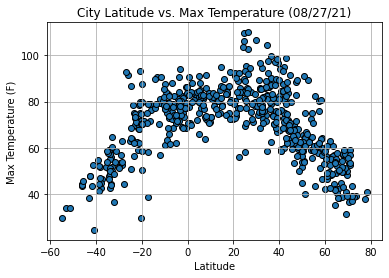

In [26]:
x = df_clean['Latitude']
y = df_clean['Max_Temp']
plt.title(f"City Latitude vs. Max Temperature ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/fig1_lat_v_temp.png')
plt.show()

Figure 1 shows the relationship between the max temperature and latitude for the date specified.

As can be seen, latitudes closer towards zero are generally higher, however we should add that at the current date of 8/27/2021, there is a lean towards higher temperatures at slightly higher latitudes due to the summer soltice.

## Fig 2. Latitude vs. Humidity Plot

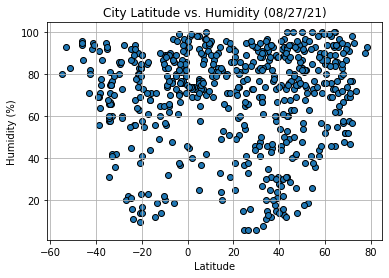

In [27]:
x = df_clean['Latitude']
y = df_clean['Humidity']
plt.title(f"City Latitude vs. Humidity ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/fig2_lat_v_humidity.png')
plt.show()

Figure 2 shows the relationship between the max temperature and latitude for the date specified.

There is no clear relationship between latitude and humidity.

## Fig 3. Latitude vs. Cloudiness Plot

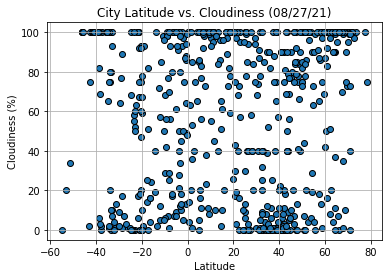

In [29]:
x = df_clean['Latitude']
y = df_clean['Cloudiness']
plt.title(f"City Latitude vs. Cloudiness ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/fig3_lat_v_cloudiness.png')
plt.show()

Figure 3 shows the relationship between the cloudiness and latitude for the date specified.

There is no clear relationship between latitude and cloudiness.

## Fig 4. Latitude vs Wind Speed Plot

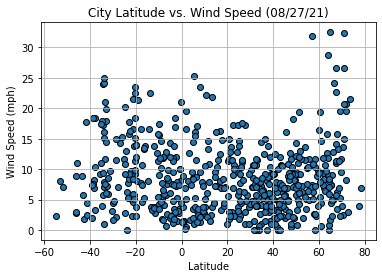

In [30]:
x = df_clean['Latitude']
y = df_clean['Wind_Speed']
plt.title(f"City Latitude vs. Wind Speed ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/fig4_lat_v_windspeed.png')
plt.show()

Figure 4 shows the relationship between the wind speed and latitude for the date specified.

There is a very weak inverse correlation in wind speed vs latitude and max temperature vs latitude.  For example, the latitudes where max temperature is currently highest appear to have lower windspeed in general than latitudes at the extremes such as near the poles.  However, this inverse correlation appears to be very weak.

## Linear Regression

In [31]:
# Divide data between northern and southern hemispheres
n_hem = df_clean[(df_clean.Latitude > 0)]
s_hem = df_clean[(df_clean.Latitude < 0)]

####  Fig 5. Northern Hemisphere - Max Temp vs. Latitude Linear Regression

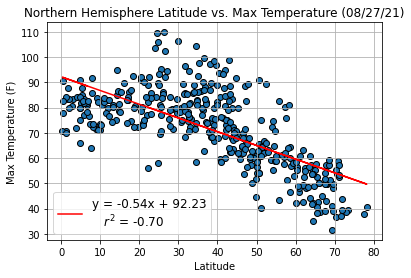

In [32]:
x = n_hem['Latitude']
y = n_hem['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line = x * slope + intercept
plt.plot(x,line,'r',
         label='y = {:.2f}x + {:.2f}\n   $r^2$ = {:.2f}'.format(slope,intercept,rvalue))
plt.title(f"Northern Hemisphere Latitude vs. Max Temperature ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.legend(fontsize=12)
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/fig5_n_hem_lat_v_temp.png')
plt.show()

####  Fig 6. Southern Hemisphere - Max Temp vs. Latitude Linear Regression

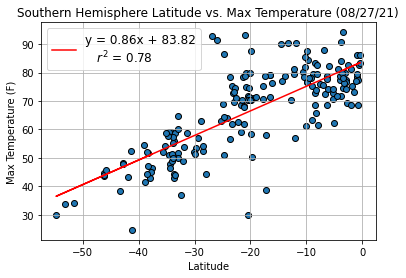

In [33]:
x = s_hem['Latitude']
y = s_hem['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line = x * slope + intercept
plt.plot(x,line,'r',
         label='y = {:.2f}x + {:.2f}\n   $r^2$ = {:.2f}'.format(slope,intercept,rvalue))
plt.title(f"Southern Hemisphere Latitude vs. Max Temperature ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.legend(fontsize=12)
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/fig6_s_hem_lat_v_temp.png')
plt.show()

In Figures 5 and 6, we look at the relationship between max temperature vs latitude for both the northern and southern hemispheres, respectively.

As is evidenced by the data through the linear regression r squared values of greater than or equal to 70, there is a strong correlation between latitudes that are closer to the zero latitude line and higher max temperatures.

As of this date, 8/27/2021, it can be seen that the r squared value of the southern hemisphere has a greater value than that of the northern hemisphere.  This is most probably due to the summer solstice in the northern hemisphere which causes higher temperatures to occur at slightly higher than the zero latitude line.

####  Fig 7. Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

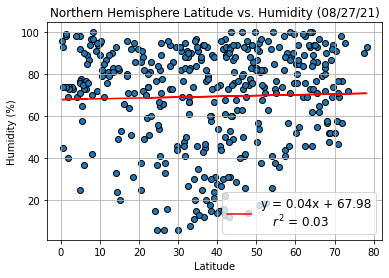

In [34]:
x = n_hem['Latitude']
y = n_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line = x * slope + intercept
plt.plot(x,line,'r',
         label='y = {:.2f}x + {:.2f}\n   $r^2$ = {:.2f}'.format(slope,intercept,rvalue))
plt.title(f"Northern Hemisphere Latitude vs. Humidity ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend(fontsize=12)
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/fig7_n_hem_lat_v_humidity.png')
plt.show()

####  Fig 8. Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

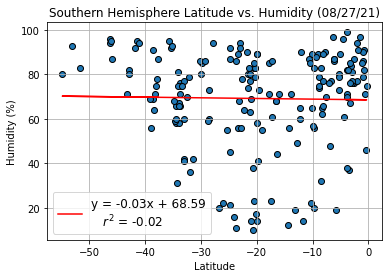

In [35]:
x = s_hem['Latitude']
y = s_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line = x * slope + intercept
plt.plot(x,line,'r',
         label='y = {:.2f}x + {:.2f}\n   $r^2$ = {:.2f}'.format(slope,intercept,rvalue))
plt.title(f"Southern Hemisphere Latitude vs. Humidity ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend(fontsize=12)
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/fig8_s_hem_lat_v_humidity.png')
plt.show()

In Figures 7 and 8, we look at the relationship between humidity vs latitude for both the northern and southern hemispheres, respectively.

As is evidenced by the data through the linear regression r squared values of close to zero, there is little to no correlation between humidity and latitude.

####  Fig 9. Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

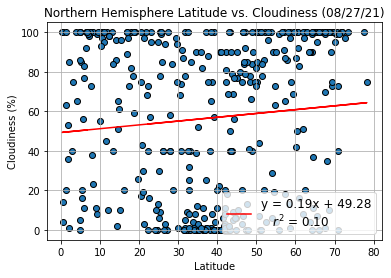

In [36]:
x = n_hem['Latitude']
y = n_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line = x * slope + intercept
plt.plot(x,line,'r',
         label='y = {:.2f}x + {:.2f}\n   $r^2$ = {:.2f}'.format(slope,intercept,rvalue))
plt.title(f"Northern Hemisphere Latitude vs. Cloudiness ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend(fontsize=12)
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/fig9_n_hem_lat_v_cloudiness.png')
plt.show()

####  Fig 10. Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

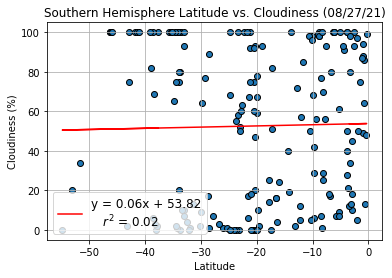

In [37]:
x = s_hem['Latitude']
y = s_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line = x * slope + intercept
plt.plot(x,line,'r',
         label='y = {:.2f}x + {:.2f}\n   $r^2$ = {:.2f}'.format(slope,intercept,rvalue))
plt.title(f"Southern Hemisphere Latitude vs. Cloudiness ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend(fontsize=12)
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/fig10_s_hem_lat_v_cloudiness.png')
plt.show()

In Figures 9 and 10, we look at the relationship between cloudiness vs latitude for both the northern and southern hemispheres, respectively.

As is evidenced by the data through the linear regression r squared values of close to zero, there is little to no correlation between humidity and latitude.

However, it should also be noted that on this particular day 8/27/2021, the data is more polarized, showing many datapoints at the extremes of either close to zero or close to 100 for both the northern and southern hemispheres with less datapoints at the midline of around 40 to 60% cloudiness.

####  Fig 11. Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

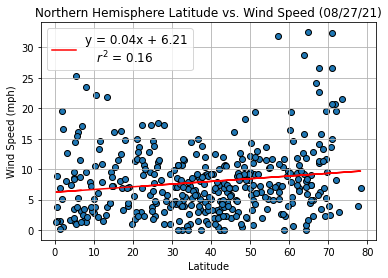

In [38]:
x = n_hem['Latitude']
y = n_hem['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line = x * slope + intercept
plt.plot(x,line,'r',
         label='y = {:.2f}x + {:.2f}\n   $r^2$ = {:.2f}'.format(slope,intercept,rvalue))
plt.title(f"Northern Hemisphere Latitude vs. Wind Speed ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.legend(fontsize=12)
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/fig11_n_hem_lat_v_windspeed.png')
plt.show()

####  Fig 12. Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

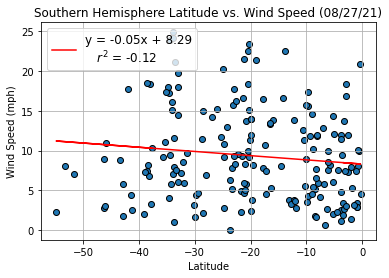

In [39]:
x = s_hem['Latitude']
y = s_hem['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line = x * slope + intercept
plt.plot(x,line,'r',
         label='y = {:.2f}x + {:.2f}\n   $r^2$ = {:.2f}'.format(slope,intercept,rvalue))
plt.title(f"Southern Hemisphere Latitude vs. Wind Speed ({timestampstr})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.legend(fontsize=12)
plt.grid()
plt.scatter(x,y,edgecolor="black")
plt.savefig('../output_data/fig12_s_hem_lat_v_windspeed.png')
plt.show()

In Figures 11 and 12, we look at the relationship between wind speed vs latitude for both the northern and southern hemispheres, respectively.

As is evidenced by the data through the linear regression r squared values of close to zero, there is little to no correlation between wind speed and latitude.